In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# %load_ext autoreload
# the "1" means: always reload modules marked with "%aimport"
# %autoreload 1

from __future__ import absolute_import, division, print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
import mpld3
import numpy as np
import pandas as pd
import os, sys
import warnings

In [2]:
!conda install matplotlib-venn -y

Using Anaconda API: https://api.anaconda.org
Fetching package metadata .........
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /Users/jonathan/miniconda3/envs/py3:
#
matplotlib-venn           0.11.4                   py35_0    conda-forge


In [ ]:
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles

In [31]:
from itertools import combinations, islice, takewhile
from numpy.random import randint, shuffle, choice

In [30]:
num = 100
names = [''.join(x) for x in islice(combinations('abcdefghijklmnopqrstuvwxyz', 2), num)]

In [47]:
size_1 = 50
size_2 = 75
df1 = pd.DataFrame({'names':choice(names, size_1, replace=False), 
                    'random':np.random.rand(size_1),
                   })
df2 = pd.DataFrame({'names':choice(names, size_2, replace=False), 
                    'random':np.random.rand(size_2),
                   })

In [48]:
merged = pd.merge(df1, df2, how='inner', on="names")

In [55]:
len(df1), len(merged), len(df2)

(50, 40, 75)

In [72]:
def merge_sizes(left_df, merged_df, right_df):
    """Grab the relative lengths. Key thing that happens here is that the overlap size has to be 
    subtracted from the total size of each of the joining tables."""
    return len(left_df) - len(merged_df), len(merged_df), len(right_df) - len(merged_df)

In [73]:
def plot_join_results(left=3, overlap=1, right=2, 
                      left_name="A", right_name="B",
                      left_color='r', right_color='g',
                      title="",
                     ):
    """Create a Venn diagram with given inputs"""
    fig, ax = plt.subplots(figsize=(8, 8))
    venn2(subsets = (left, right, overlap),
          set_labels=(left_name, right_name), 
          set_colors=(left_color, right_color),
          ax=ax);
    if title:
        ax.set_title(title)
    return

In [84]:
hex_to_name = {
 '#D34100': 'leafblower red',
 '#707071': 'medium gray',
 '#ECEFF0': 'oyster gray',
 '#2C3E4F': 'tardis blue',
 '#F15E24': 'dark orange',
 '#FF9700': 'orange',
 '#0055A7': 'blue',
 '#091D32': 'midnight tardis',
 '#26C5ED': 'sully blue',
 '#00CC66': 'leaf green',
 }
svds_color_dict = {v: k for k, v in hex_to_name.items()}

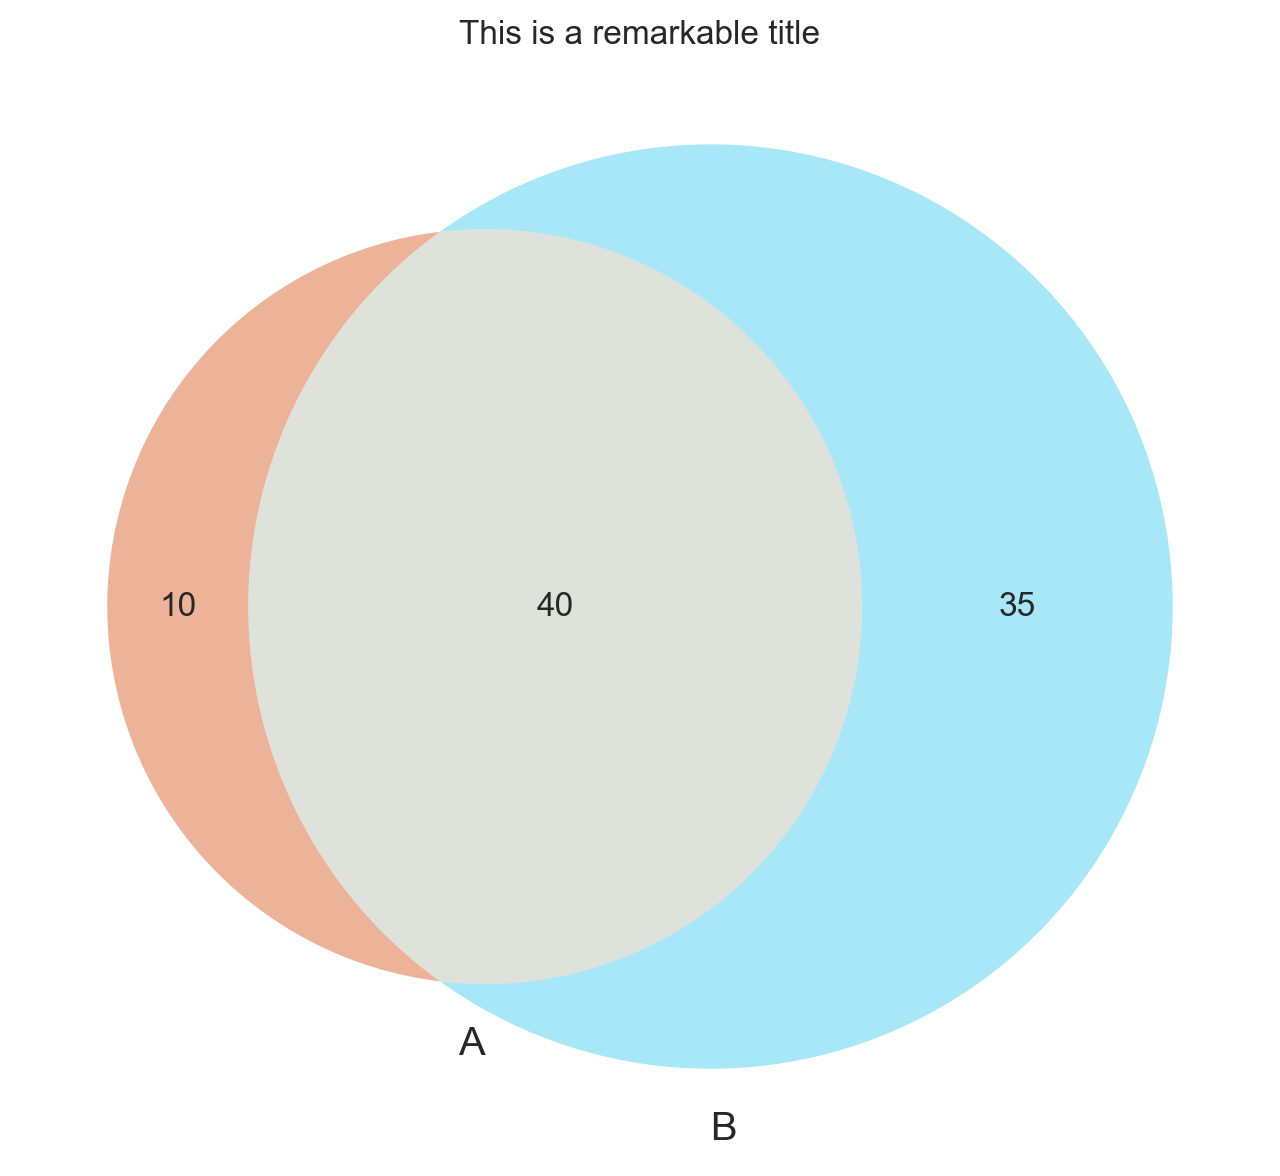

In [89]:
plot_join_results(*merge_sizes(df1, merged, df2), title='This is a remarkable title',
                  left_color=svds_color_dict['leafblower red'], right_color=svds_color_dict['sully blue'])

# From [the docs](https://pypi.python.org/pypi/matplotlib-venn)

The following show some more complicated things. The set one on the bottom doesn't correspond to what I'd expect to happen, so beware!

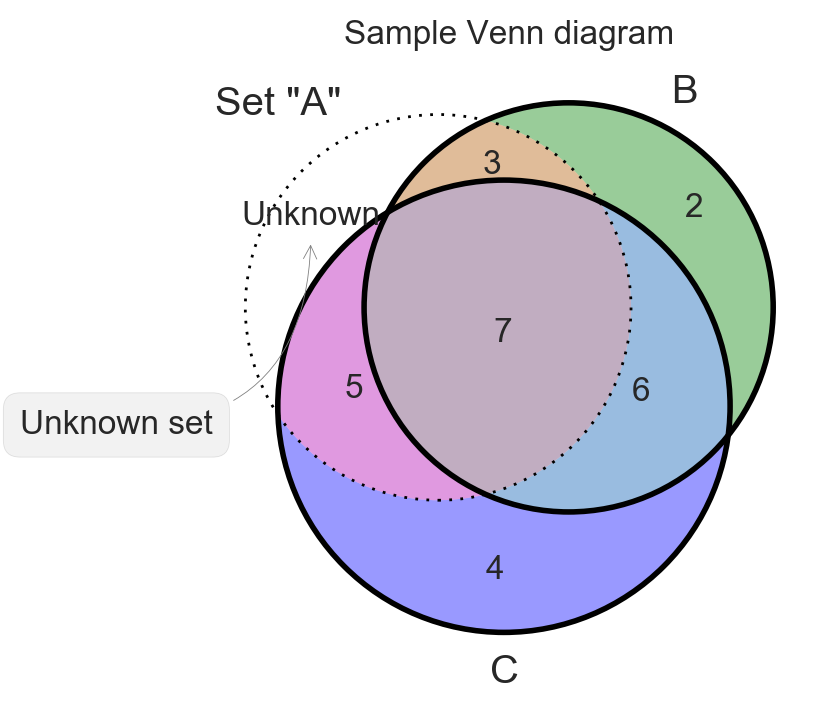

In [10]:
fig, ax = plt.subplots(figsize=(4,4))
v = venn3(subsets=(1, 2, 3, 4, 5, 6, 7), set_labels = ('A', 'B', 'C'), ax=ax)
v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('Unknown')
v.get_label_by_id('A').set_text('Set "A"')
c = venn3_circles(subsets=(1, 2, 3, 4, 5, 6, 7))
# , linestyle='dashed')
c[0].set_lw(1.0)
c[0].set_ls('dotted')
ax.set_title("Sample Venn diagram")
ax.annotate('Unknown set', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'));

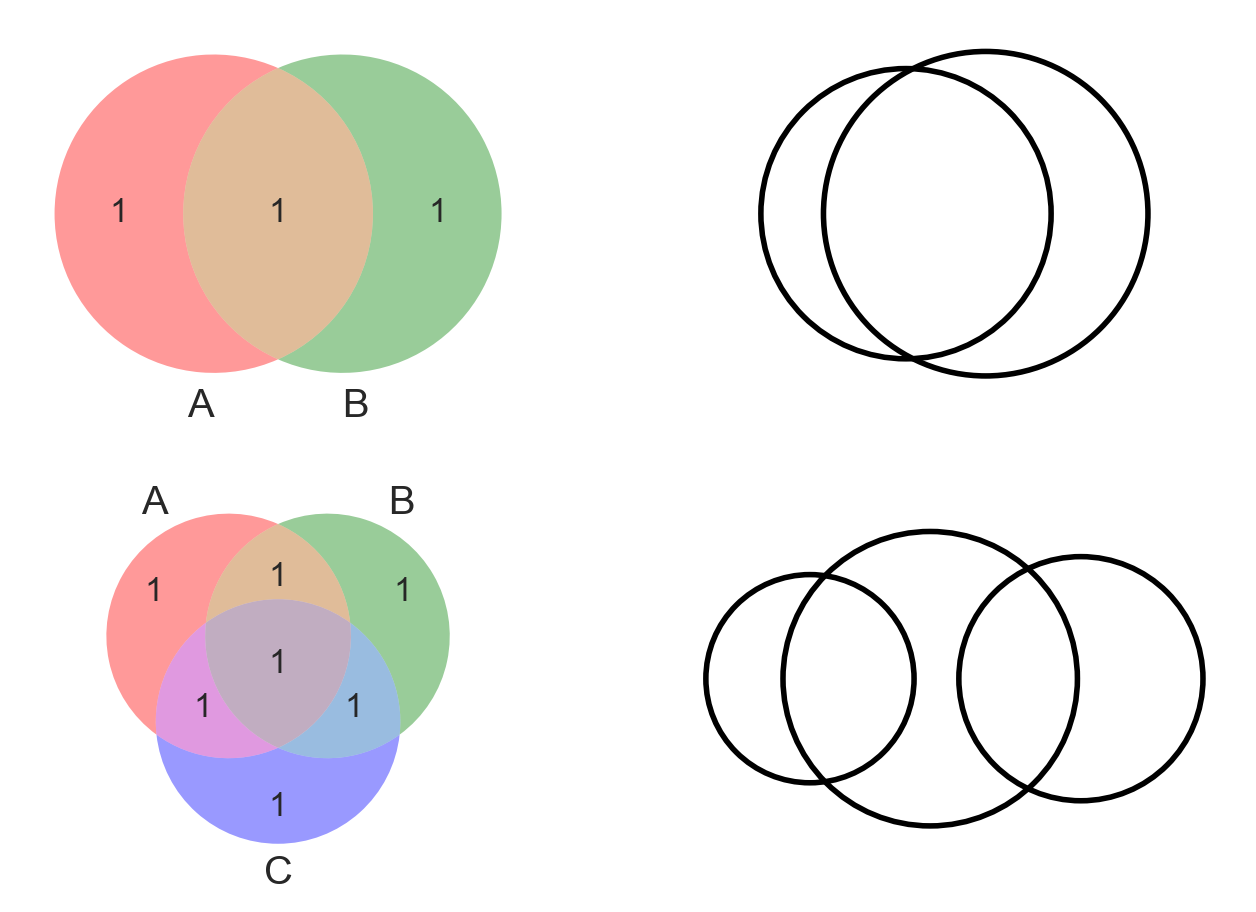

In [12]:
figure, axes = plt.subplots(2, 2)
venn2(subsets={'10': 1, '01': 1, '11': 1}, set_labels = ('A', 'B'), ax=axes[0][0])
venn2_circles((1, 2, 3), ax=axes[0][1])
venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'), ax=axes[1][0])
venn3_circles({'001': 10, '100': 20, '010': 21, '110': 13, '011': 14}, ax=axes[1][1])
# plt.show()

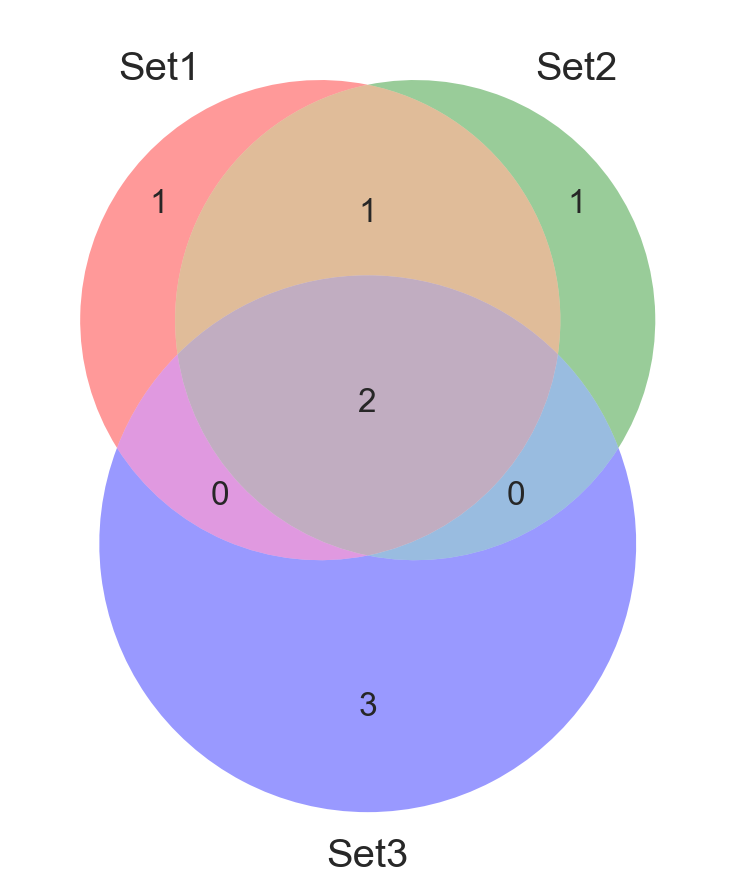

In [66]:
set1 = set(['A', 'B', 'C', 'D'])
set2 = set([     'B', 'C', 'D', 'E'])
set3 = set([          'C', 'D',' E', 'F', 'G'])

venn3([set1, set2, set3], ('Set1', 'Set2', 'Set3'))
plt.show()